

# Data Exploration and Visualizations

*Exploratory Data Analysis (EDA)* is the process where a Data Scientist gathers information 
from a dataset. This inclues knowing the source of the data, an understading 
of what the data itself represents, the features that describe the data, the type 
of data in each feature, and what stories comes out from the data. 

Data visualisation is the most agile method to acquire information from a dataset.

# Goals of this lecture
0. Know your data before you start. 
0. Inspect data for faults
0. How to explore your data. 
0. How to find relationships mathematically and visually. 
0. To give you the building blocks on visualizing data with python. 

In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# First things first... load the data

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<img src='https://ib.bioninja.com.au/_Media/flower-labelled_med.jpeg'>

In [3]:
df['class'].value_counts()

Iris-virginica     54
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

<img src='https://i.imgur.com/RcxYYBA.png'>

### Lets see how 'big' our data is by printing its shape.

In [4]:
print(df.shape)

(154, 5)


# Lets look at the description and information about our dataset.
* Why, it gives us a high level summary view of our data.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,153.000000,153.000000,153.000000,153.000000
mean,6.885621,3.582353,4.684967,1.567320
std,7.439603,3.772792,6.799679,2.722297
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,59.000000,30.000000,51.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   153 non-null    float64
 2   petal_length  153 non-null    float64
 3   petal_width   153 non-null    float64
 4   class         154 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


# Lets check if we have any null values in our data.

In [7]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
149,False,False,False,False,False
150,True,True,True,True,False
151,False,False,False,False,False
152,False,False,False,False,False


### Remove, aka Drop, our null values

In [8]:
df.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
class           0
dtype: int64

In [9]:
print(df.shape)

# df.dropna(inplace=True)
df = df.dropna()

# Sanity Check
print(df.shape)

# pring how many null values there are
df.isnull().sum()


(154, 5)
(153, 5)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Instead of just dropping Null values, you can fill them in creative ways.  
[here is a tutorial about that](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

```python
df = pd.read_csv('data/iris.csv')
df.sepal_length.fillna(  df.sepal_length.median()  )
df.isnull().sum()
```


---

# Check for duplicate rows.

In [10]:
print( df.duplicated().sum())
df.duplicated()

5


0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
151    False
152     True
153     True
Length: 153, dtype: bool

# Drop said duplicates...
Because `df.duplicated()` returns a selection boolean mask, where it is `True` when the row is duplicated, how would we use that to filter to remove the duplicated rows from our data set..?

In [11]:
# Ask students to solve this one...
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(153, 5) before dropping dupes
(148, 5) after dropping dupes


# Plotting
`df.plot(kind='scatter', x='COLUMN_NAME', y='COLUMN_NAME')`
```
The kinds of plot we can produce:
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        - 'scatter' : scatter plot
        - 'hexbin' : hexbin plot.`
```

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

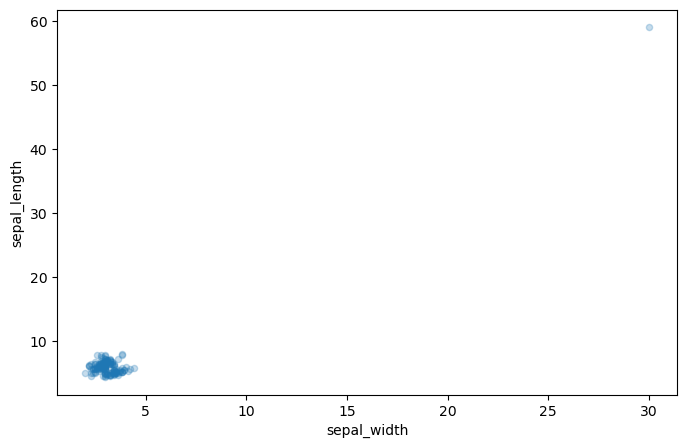

In [12]:
df.plot(
    kind='scatter', 
    x='sepal_width', 
    y='sepal_length',
    figsize=(8, 5),
    alpha=0.25)

# How do we remove this outlier...?

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

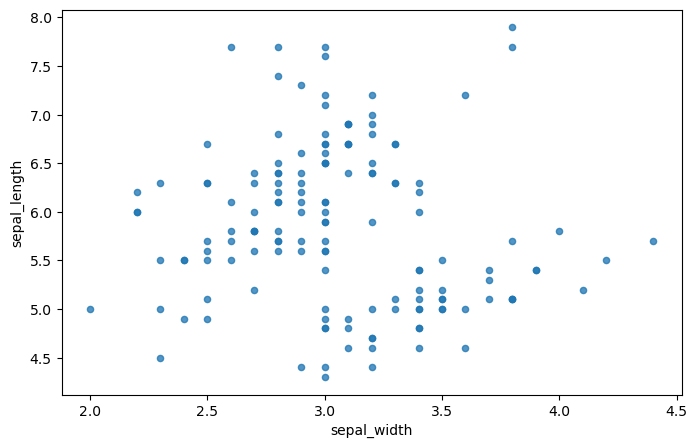

In [13]:
# Ask students to see if they can answer this. 

select_condition = df.sepal_width < 15

df = df[select_condition]

df.plot(
    kind='scatter', 
    x='sepal_width', 
    y='sepal_length', 
    figsize=(8, 5), 
    alpha=0.77)

# More plotting.

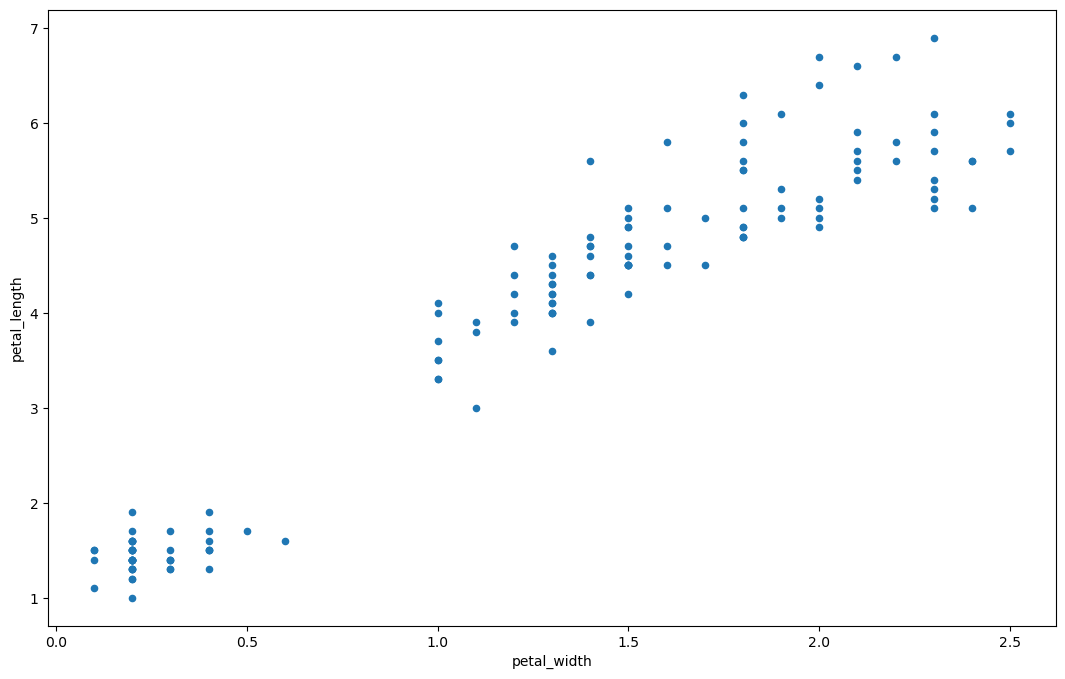

In [14]:
df.plot(kind='scatter', 
        x='petal_width', 
        y='petal_length', 
        figsize=(13,8));

# Bar Charts

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Plotting Group-by Objects

<Axes: ylabel='class'>

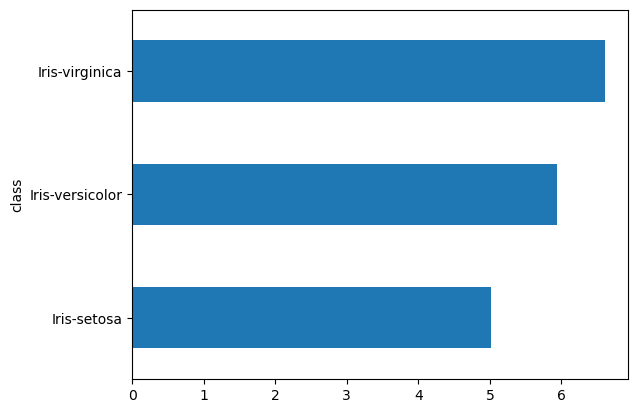

In [16]:
# Find the mean sepal_length for each of the classes 
gb = df.groupby('class')
# Find the mean
sepal_mean = gb['sepal_length'].mean()

# Plot it
sepal_mean.plot(kind='barh')

# Histograms are great for finding what type of distribution the data is.

<Axes: ylabel='Frequency'>

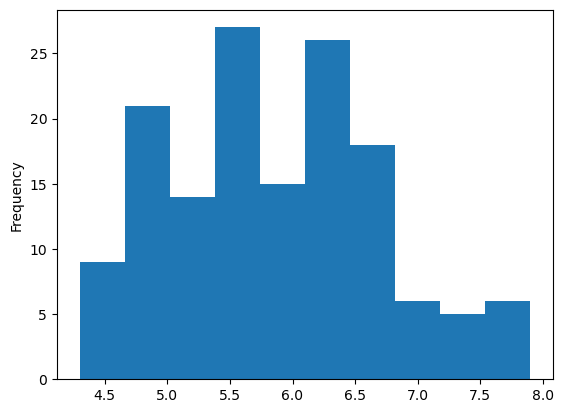

In [17]:
df['sepal_length'].plot(kind='hist',bins=10)

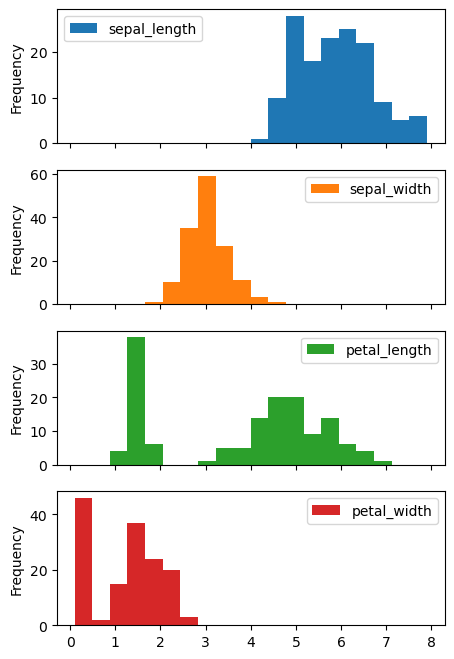

In [18]:
df.plot(bins=20, kind='hist', subplots=True, figsize=(5,8));

# Enter [Seaborn](https://seaborn.pydata.org/)
Seaborn is a visualization library that makes pretty plotting easy and fun. 
* Gallery of Examples:  https://seaborn.pydata.org/examples/index.html


### Scatter plots with Seaborn
* [Scatterplot Reference](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

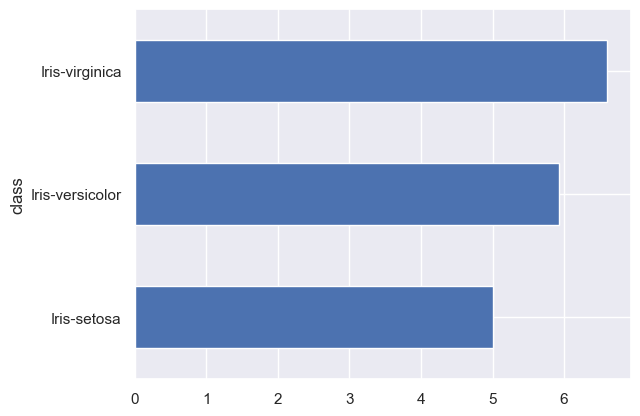

In [19]:
import seaborn as sns
# Dont forget to call sns.set()! 
sns.set()

# This tells the program to use the seaborn styles 
# Which make our graphs awesome looking


# # Call using sns, and pass in the data frame.
# ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

# Find the mean sepal_length for each of the classes 
gb = df.groupby('class')


sepal_mean = gb['sepal_length'].mean()


# # # # Make a bar plot of said means
sepal_mean.plot(kind='barh');

### Seaborn plotting functions return an `axis` object aka `ax`, which you can then set chart options on. 
* All the options you can set using the axis object.
    * https://matplotlib.org/3.3.1/api/axes_api.html

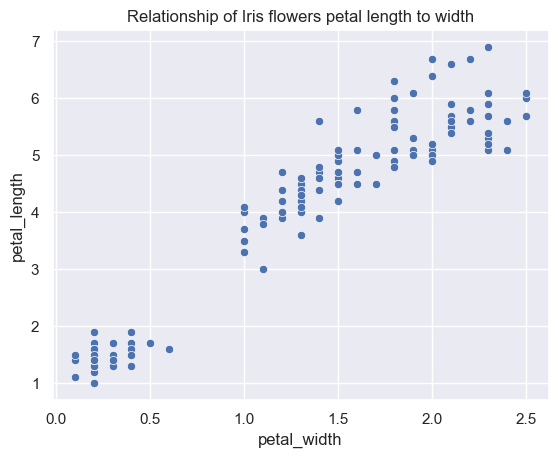

In [20]:
ax = sns.scatterplot(
    data=df, 
    x='petal_width', 
    y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width");

# Changing Axes

(0.0, 25.0)

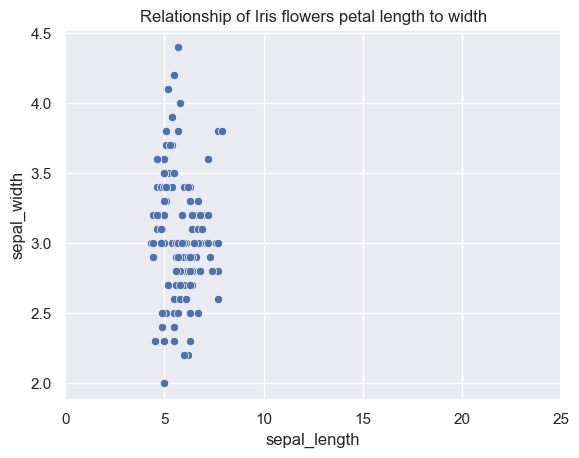

In [21]:
# Say you wanted to change the x-axis
ax = sns.scatterplot(data=df, x='sepal_length', y='sepal_width');

ax.set_title("Relationship of Iris flowers petal length to width");

ax.set_xlim(0, 25)

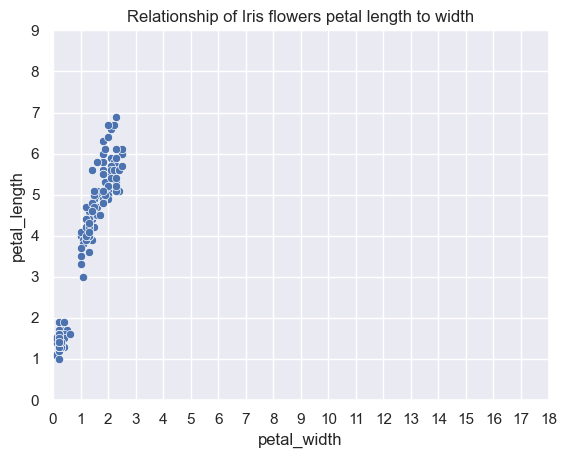

In [22]:
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length');

ax.set_title("Relationship of Iris flowers petal length to width");

ax.set_xticks(range(0,19));
ax.set_yticks(range(0,10));

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

# What if we wanted to change the color of the markers based on the type of flower it is.
* Have students read documentation it to see if they can figure it out.
    * https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'measured in centemeters')

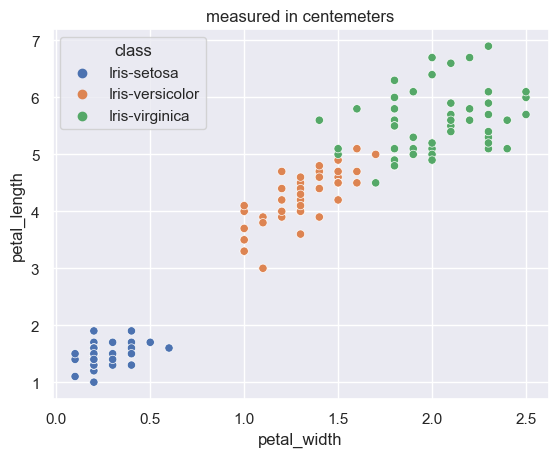

In [26]:
ax = sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length', 
                hue='class');

ax.set_title('measured in centemeters')

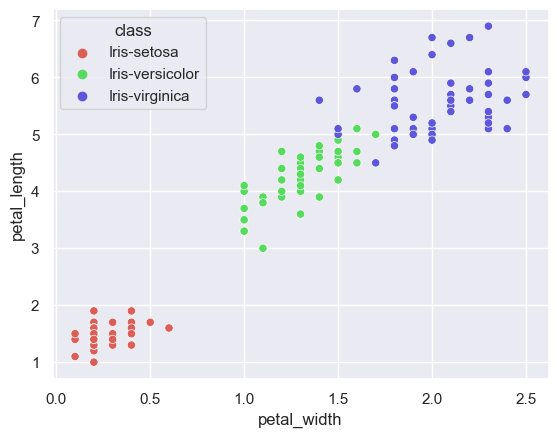

In [27]:
sns.scatterplot(data=df, 
                x='petal_width', 
                y='petal_length', 
                hue='class', 
                palette='hls');

# The super scatter plot

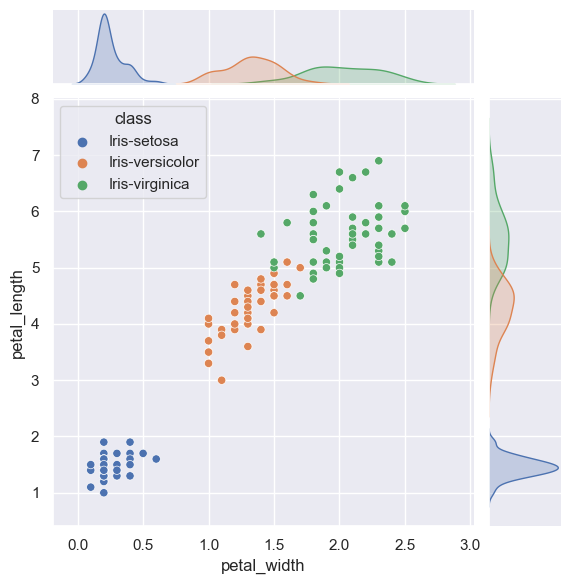

In [28]:
sns.jointplot(data=df, x='petal_width', y='petal_length', hue='class');

15

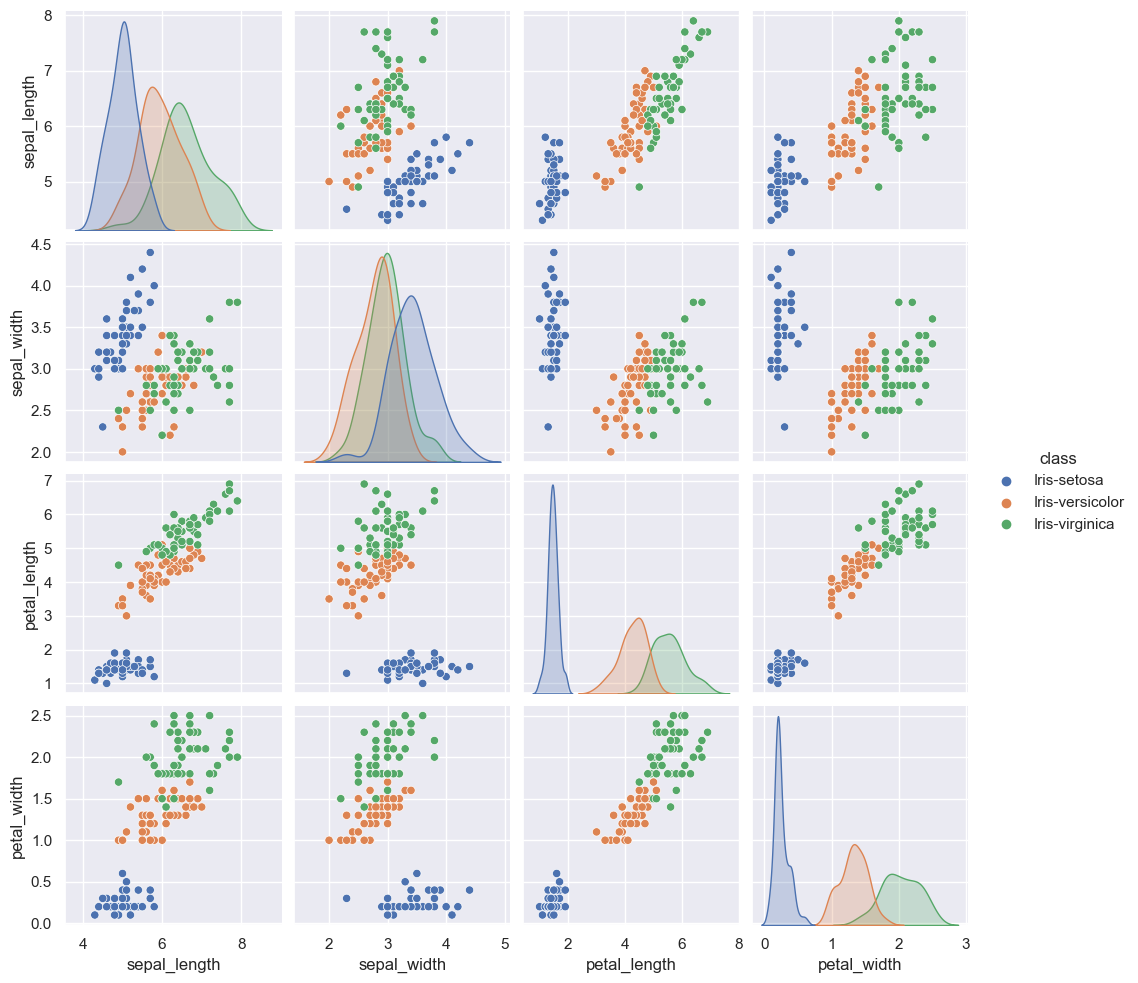

In [29]:
sns.pairplot(df, hue='class');


sample_df = df.sample(frac=0.1)
len(sample_df)

In [30]:
sample_df.shape

(15, 5)

## Plotting the line of best fit
* Using `sns.regplot` and `sns.lmplot` you can easily plot regression analyses.

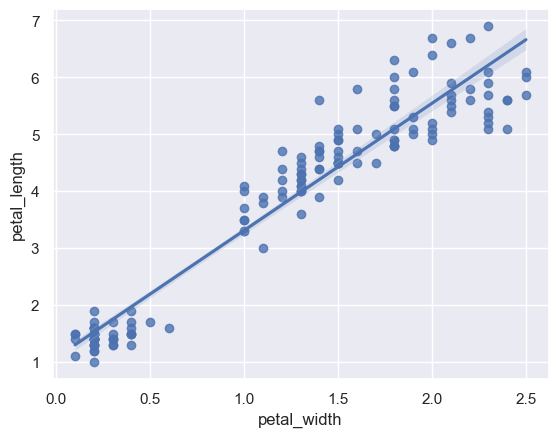

In [31]:
sns.regplot(data=df, x='petal_width', y='petal_length');

## The catch all plot function

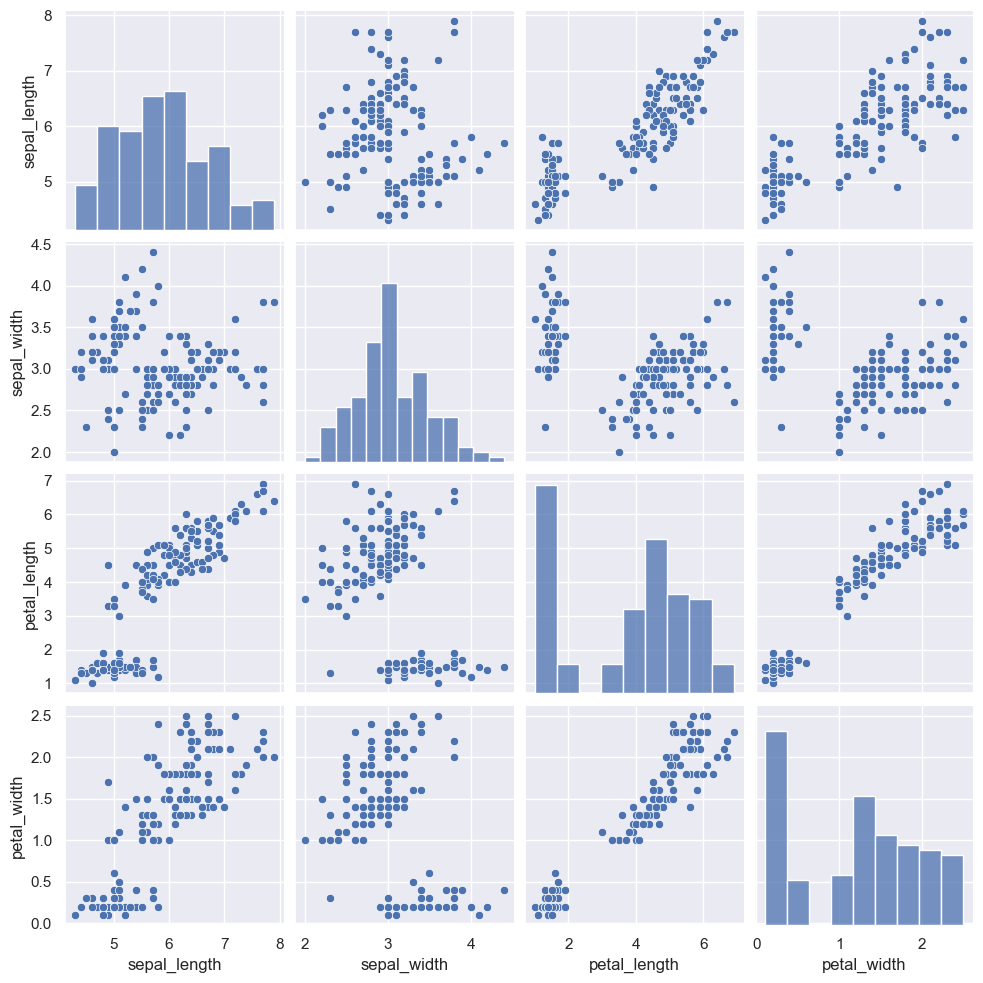

In [32]:
sns.pairplot(df);

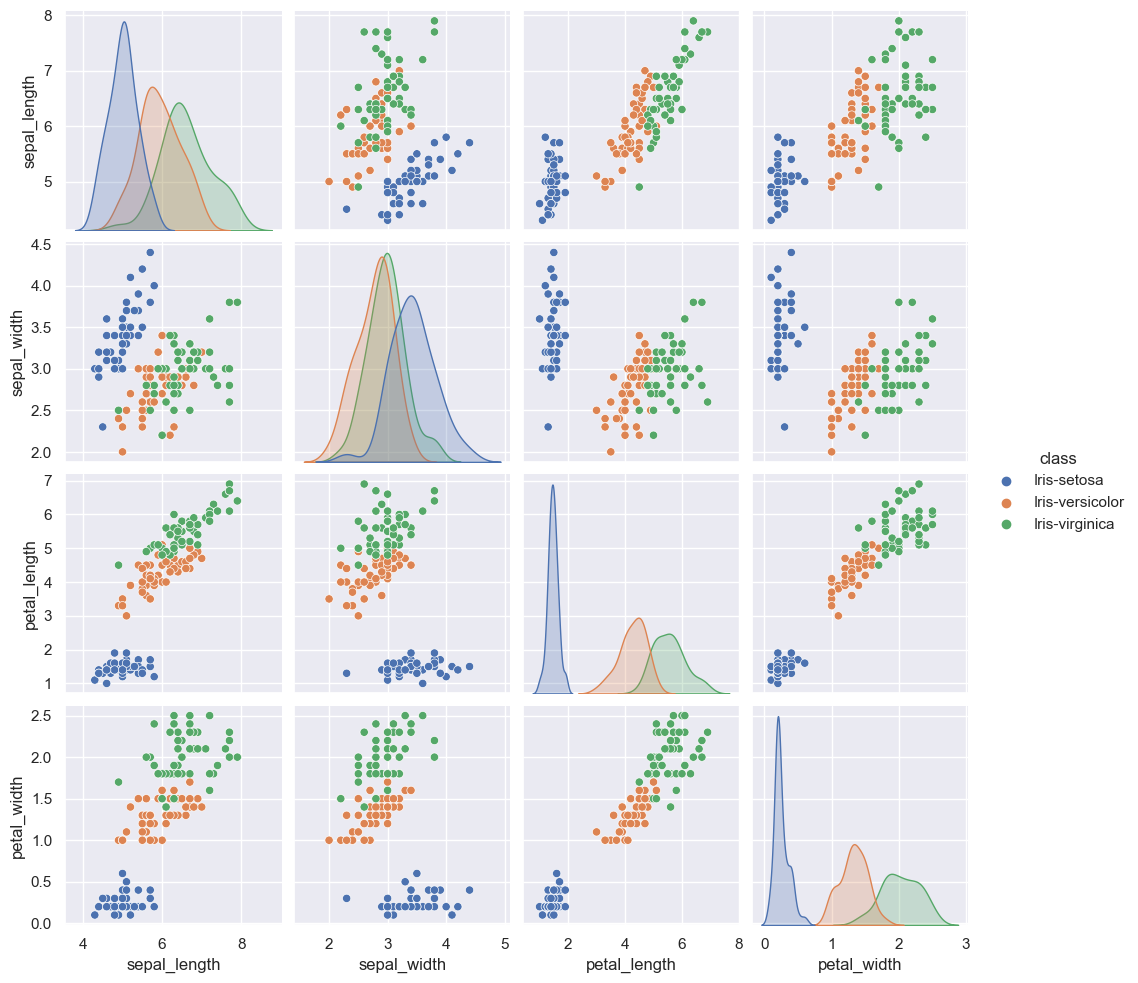

In [33]:
sns.pairplot(df, hue='class');

# Finding Correlations in your data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related. [Learn more here](https://en.wikipedia.org/wiki/Correlation_and_dependence)

<img src='https://www.onlinemathlearning.com/image-files/correlation-coefficient.png' width=500>

In [34]:
# This functions finds the correlation between all numerical values.
df.corr()

/var/folders/4w/4f8yp1td7l7_p77z3vdgy0dh0000gn/T/ipykernel_17160/1294594643.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


# Easily visualize your correlations with a heatmap.

/var/folders/4w/4f8yp1td7l7_p77z3vdgy0dh0000gn/T/ipykernel_17160/2871561456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr() )


<Axes: >

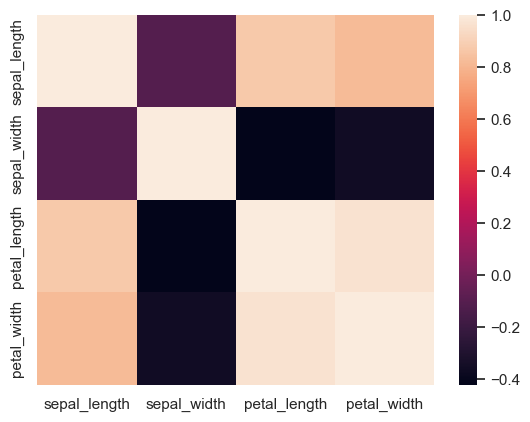

In [35]:
sns.heatmap( df.corr() )

/var/folders/4w/4f8yp1td7l7_p77z3vdgy0dh0000gn/T/ipykernel_17160/3471770790.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


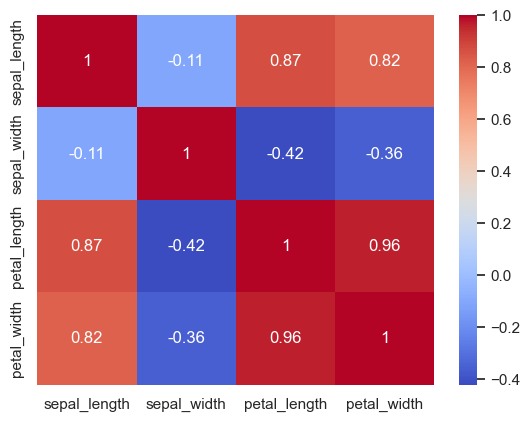

In [40]:
# sns.heatmap(df.corr(), annot=True, cmap='Spectral')
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm');


---


# Main take aways I want you to remember. 
### 0. Use common sense, know what your data columns are before anything.
### 1. Always inspect your data for nulls, dupes, and outliers. 
### 2. Plotting with pandas is easy, but limitied. Plotting libs usually return an `axis` object. 
### 3. Seaborn is great, but there are many many more libs for python for data viz. 


##### End of this lecture. 

---

##### Dont forget to update your fork
Every week, run these commands:
1. `git fetch upstream`
2. `git merge upstream/main`
3. `git push`